In [1]:
import os,sys
import pathlib
sys.path.append(os.path.abspath('.'))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
# Grab dataset and clean it
path = "/home/jorgefederico/astronomia_extragalactica/practico5/field.dat"
names = ["ra","dec","z","Mr","ur","mur","r50","c","smass","sfr","ssfr","d4000","met", "w","mest","tau","zm","rsf","pe","ps","nuvr"]
df = pd.read_csv(path,delim_whitespace=True,names=names)
df2 = df[(df['smass']!=-9.)&(df["z"]<0.15)&(df['met']!=-99.9)&(9.0<df["smass"])&(df["smass"]<11.5)&(df['z']>0.05)&(df['d4000']>0)]
df2.reset_index(inplace=True)

In [4]:
df['z'].describe()

count    508330.000000
mean          0.110959
std           0.054306
min           0.004500
25%           0.069920
50%           0.105140
75%           0.146358
max           0.300000
Name: z, dtype: float64

In [5]:
# El catalogo no tiene metalicidad
path0 = "/home/jorgefederico/astronomia_extragalactica/practico5/groups.dat"
df0 = pd.read_csv(path0,delim_whitespace=True,header=0)
df02 = df0[(df0['smass']!=-9.)&(df0["z"]<0.15)&(9.0<df0["smass"])&(df0["smass"]<11.5)&(df0['z']>0.05)&(df0['d4000']>0)]

# Lista de propiedades:
- Propiedades del catálogo MPA -JHU:
- smass -> masa estelar -> log(M*) en unidades de masa solar
- sfr -> tasa de formación estelar  -> log(SFR) en unidades de Msolar /yr
- ssfr -> tasa de formación estelar específica -> log(sSFR) en unidades de /yr
- d4000 -> Dn(4000)
- met -> metalicidad O/H -> 12+log(O/H)

- w -> peso basado en 1/Vmax

- mest,tau,zm,rsf -> propiedades derivadas de otro catalogo VESTA (no las vamos a usar)
- pe -> probabilidad de ser eliptica de galaxy zoo
- ps -> probabilidad de ser espiral de galaxy zoo
- nuvr - color NUV -r

In [6]:
list(df)

['ra',
 'dec',
 'z',
 'Mr',
 'ur',
 'mur',
 'r50',
 'c',
 'smass',
 'sfr',
 'ssfr',
 'd4000',
 'met',
 'w',
 'mest',
 'tau',
 'zm',
 'rsf',
 'pe',
 'ps',
 'nuvr']

# Control plots

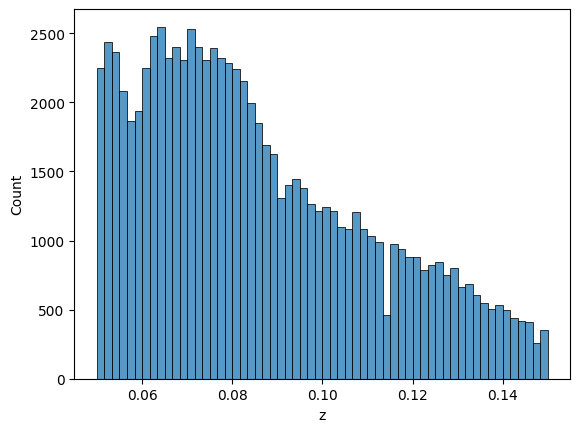

In [7]:
sns.histplot(data=df2,x='z')
plt.savefig("hist_z.jpg")

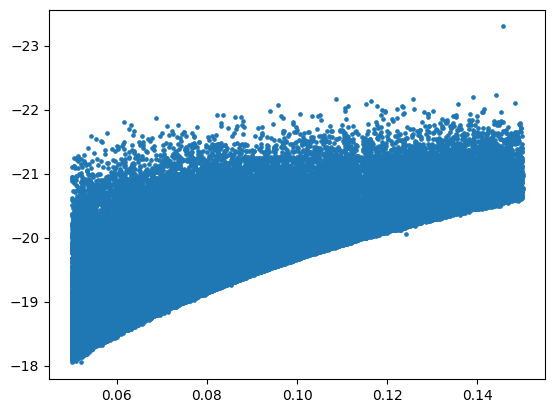

In [8]:
plt.scatter(df2['z'],df2['Mr'],s=5.5)
plt.gca().invert_yaxis()

<Axes: xlabel='smass', ylabel='Count'>

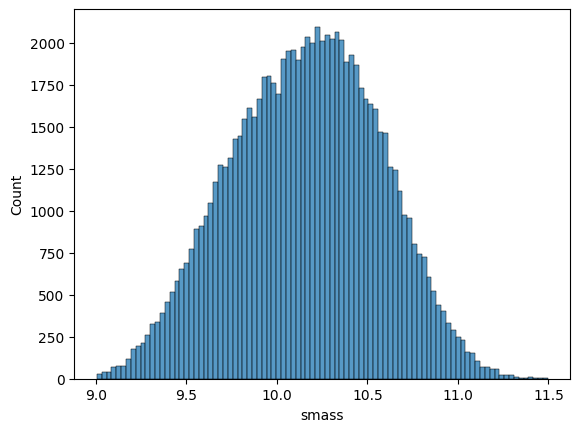

In [9]:
# Distribucion smas (log M*)
sns.histplot(data=df2,x='smass')

<Axes: xlabel='met', ylabel='Count'>

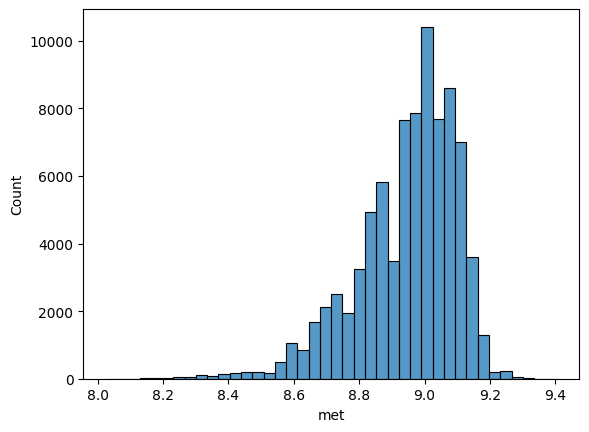

In [10]:
# Distribucion met (12 + log(O/H))
sns.histplot(data=df2,x='met',bins=40)

In [11]:
counts,bins = np.histogram(df2['smass'],bins=20)
b_min = bins[:-1]
b_max = bins[1:]
mids = (bins[1:] + bins[:-1])/2

# get smass:(log M*)
# get met:12 + log(O/H)
smass = np.array(df2['smass'])
met = np.array(df2['met'])
# get weights
w = np.array(df2['w'])

# get indexes.
indx = [np.where((smass<=b[1])&(smass>=b[0]))[0] for b in zip(b_min,b_max)]


In [12]:
# get met values in each bin (each bin isrepresented by set of indexes in indx)
# then get the mean
met_ = [np.array(met[idx]) for idx in indx]
w_ = [np.array(w[idx]) for idx in indx]



In [13]:
# Mean
met_mean = [np.mean(_) for _ in met_]
# Variance
met_variance = [(np.sum(e[2]*(e[0]-e[1])**2)/np.sum(e[2]))**0.5   for e in zip(met_,met_mean,w_)]

# Weighted mean
met_weigthed_mean = [(np.sum(e[0]*e[1])/np.sum(e[1])) for e in zip(met_,w_)]
# Weighted variance
met_weigthed_variance = [(np.sum(e[2]*(e[0]-e[1])**2)/np.sum(e[2]))**0.5   for e in zip(met_,met_weigthed_mean,w_)]

# Median
met_median = np.array([np.median(_) for _ in met_])
met_q_25 = np.array([np.quantile(_,0.25) for _ in met_])
met_q_75 = np.array([np.quantile(_,0.75) for _ in met_])
err_0 = np.abs(met_median-met_q_25)
err_1 = np.abs(met_median-met_q_75)

Text(0, 0.5, '$12 + log(O/H)$')

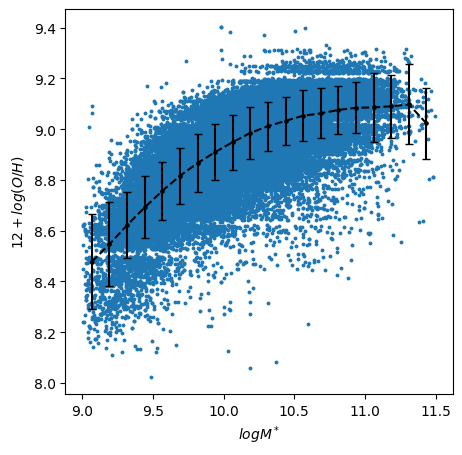

In [14]:
# Plot scatter and mean
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.scatter(smass,met,s=3.2)

# Plot of the mean
ax.scatter(mids,met_mean,s=5.5,c='black')
ax.errorbar(mids, met_mean, yerr=met_variance, capsize=3, fmt="k--o", ecolor = "black", markersize=0.5)

ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")

Text(0, 0.5, '$12 + log(O/H)$')

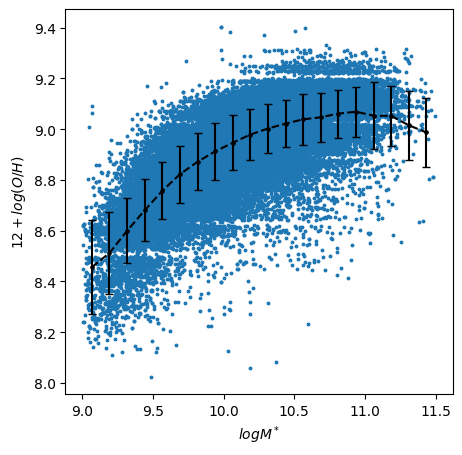

In [15]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(smass,met,s=3.2)

# Plot weigthed mean
ax.scatter(mids,met_weigthed_mean,s=5.5,c="k")
ax.errorbar(mids, met_weigthed_mean, yerr=met_weigthed_variance, capsize=3, fmt="k--o", ecolor = "black", markersize=0.5)

ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")

Text(0, 0.5, '$12 + log(O/H)$')

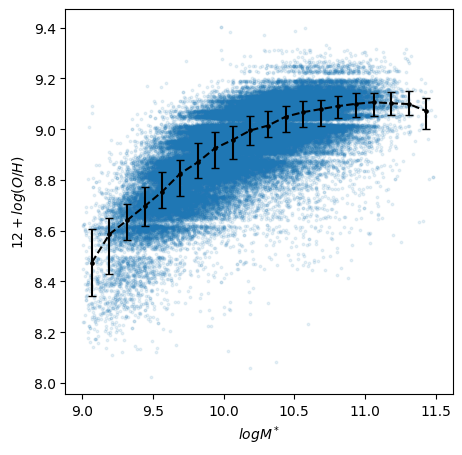

In [16]:
# Plot scatter and median
# plt.fill_between(x,y-error,y+error,alpha=0.5)
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.scatter(smass,met,s=3.2,alpha=0.1)

# Plot of the median <--- this is better
ax.scatter(mids,met_median,s=5.5,c='k')
ax.errorbar(mids, met_median, yerr=(err_0,err_1), capsize=3, fmt="k--o", ecolor = "k", markersize=0.5)

# Plot of the mean
# ax.scatter(mids,met_mean,s=5.5,c='blue')
# ax.errorbar(mids, met_mean, yerr=met_variance, capsize=3, fmt="b--o", ecolor = "blue", markersize=0.5)

ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")

# Masa vs Metalicidad con Morfologia

In [17]:
def calculator(df,x='smass',y='met'):
    counts,bins = np.histogram(df[x],bins=10) # Remover los bines con pocos puntos.
    b_min = bins[:-1]
    b_max = bins[1:]
    mids = (bins[1:] + bins[:-1])/2

    # get smass:(log M*)
    # get met:12 + log(O/H)
    x = np.array(df[x])
    y = np.array(df[y])
    # get weights
    w = np.array(df['w'])


    # get indexes.
    indx = [np.where((x<=b[1])&(x>=b[0]))[0] for b in zip(b_min,b_max)]

    # get met values in each bin (each bin isrepresented by set of indexes in indx)
    # then get the mean
    y_ = [np.array(y[idx]) for idx in indx]
    w_ = [np.array(w[idx]) for idx in indx]

    # Mean
    y_mean = [np.mean(_) for _ in y_]
    # Variance
    y_variance = [(np.sum(e[2]*(e[0]-e[1])**2)/np.sum(e[2]))**0.5   for e in zip(y_,y_mean,w_)]

    # Weighted mean
    y_weigthed_mean = [(np.sum(e[0]*e[1])/np.sum(e[1])) for e in zip(y_,w_)]
    # Weighted variance
    y_weigthed_variance = [(np.sum(e[2]*(e[0]-e[1])**2)/np.sum(e[2]))**0.5   for e in zip(y_,y_weigthed_mean,w_)]

    # Median
    y_median = np.array([np.median(_) for _ in y_])
    y_q_25 = np.array([np.quantile(_,0.25) for _ in y_])
    y_q_75 = np.array([np.quantile(_,0.75) for _ in y_])
    err_0 = np.abs(y_median-y_q_25)
    err_1 = np.abs(y_median-y_q_75)
    return y_median,err_0,err_1,x,y,mids

In [18]:
def smass_met_plotter(df,ax,x='smass',y='met',color_scat="cyan",color="blue",alpha=0.1):
    median,err0,err1,smass,met,mids=calculator(df,x=x,y=y)
    ax.scatter(smass,met,s=3.2,c=color_scat,alpha=alpha)
    ax.scatter(mids,median,s=5.5,c=color)
    ax.errorbar(mids, median, yerr=(err0,err1), capsize=3, fmt=f"{color[0]}--o", ecolor = color, markersize=0.5)
    ax.set_xlabel(r"$log(M^{*})$")
    ax.set_ylabel(r"$12 + log(O/H)$")
    return ax

## Masa vs Metalicidad - Separacion Morfologica Galaxy Zoo

Aca hacemos el plot separando elipticas y espirales segun la clasificacion del galaxy zoo

In [19]:
# Galaxy Zoo separation
df_zoo = df2[(df2['pe']>0.8)|(df2['pe']<0.2)]
df_zoo.reset_index(inplace=True)

# Ellipticals
df_zoo_e = df_zoo[df_zoo['pe']>0.8]
# Spirals
df_zoo_s = df_zoo[(df_zoo['pe']<0.1)&(df_zoo['ps']>0.9)]

# Concentration index separation
# c > 3.0
df_c_3 = df2[df2['c']>3.0]
# c< 2.5
df_c_25 = df2[df2['c']<2.5]

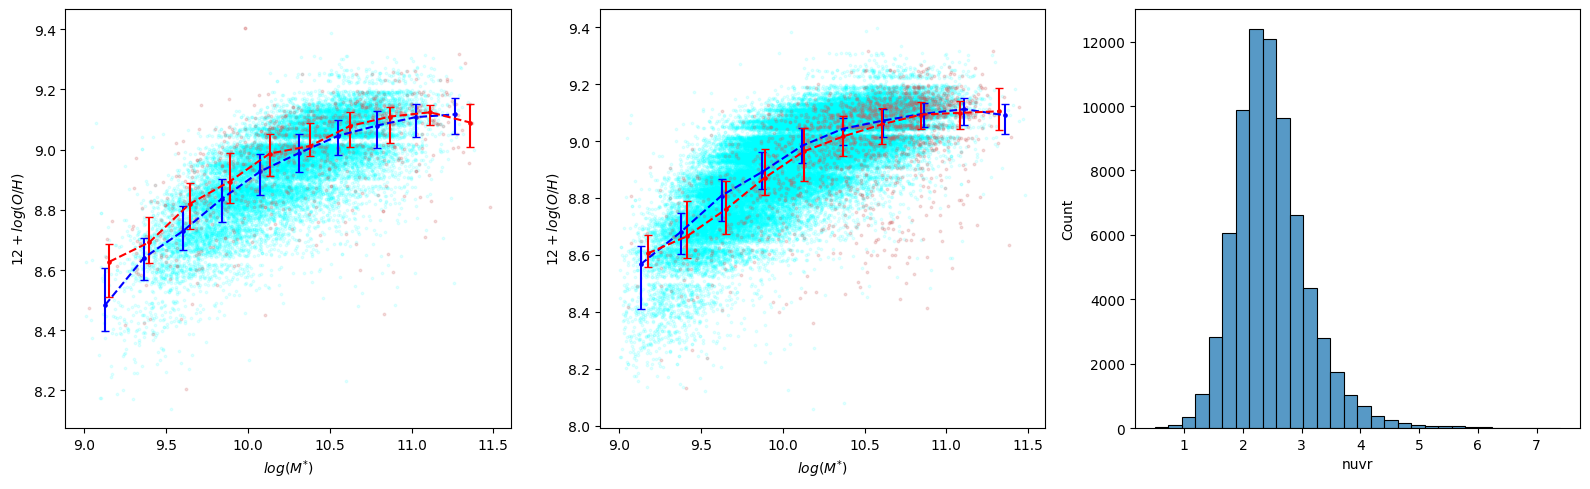

In [20]:
fig,ax = plt.subplots(1,3,figsize=(16,5))
# Galaxy Zoo
smass_met_plotter(df_zoo_s,ax=ax[0])
smass_met_plotter(df_zoo_e,ax=ax[0],color_scat='indianred',color='red',alpha=0.2)

# Concentration index
smass_met_plotter(df_c_25,ax=ax[1])
smass_met_plotter(df_c_3,ax=ax[1],color_scat='indianred',color='red',alpha=0.2)

# nuvr
sns.histplot(data=df2[(df2['nuvr']<8.0)&(df2['nuvr']>0.5)],x='nuvr',bins=30, ax=ax[2])
plt.tight_layout()
plt.savefig("mass_met.jpg")



## Masa Vs Metalicidad - Indice de Concentracion

En este plot hacemos masa vs metalicidad pero separando por indice de concentracion

In [21]:
# zandivares y martinez 2011
# Cosas para hacer


# Cosas para hacer
- Leer el paper zandivares y martinez 2011: Basicamente tendriamos que volver a ajustar las dobles gaussianas como hicimos en el practico 2.
- Despues encontrar esos puntos donde se cortan las gaussianas
- Despues se elaboraria un ajuste cuadratico con esos puntos.
- Las galaxias que quedan de un lado del ajuste son de un tipo y las que quedan del otro lado son de otro tipo.
- Para el grafico del galaxy zoo, tendrias que separar las elipticas con > 0.7 y las espirales con menor a 0.1.


Como proceder:
- Como hay una gran cantidad de galaxias de campo (azules) el punto de corte lo voy a considerar en u-r = 2.2

## Masa vs Metalicidad - Indice UV


<Axes: xlabel='nuvr', ylabel='Count'>

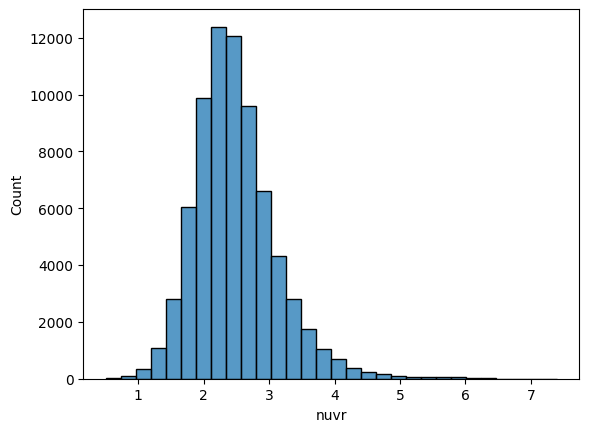

In [22]:
sns.histplot(data=df2[(df2['nuvr']<8.0)&(df2['nuvr']>0.5)],x='nuvr',bins=30)

In [23]:
# Plotter
def mass_vs_met_plotter(df,color_primary,color_secondary,ax, alpha=0.5):
    median_up,err0_up,err1_up,smass_up,met_up,mids_up=calculator(df)
    ax.scatter(smass_up,met_up,s=3.2,c=f'{color_secondary}',alpha=alpha)
    ax.scatter(mids_up,median_up,s=5.5,c=f'{color_primary}')
    ax.errorbar(mids_up, median_up,
                yerr=(err0_up,err1_up),
                capsize=3,
                fmt=f"{color_primary[0]}--o",
                ecolor = f"{color_primary}",
                markersize=0.5)
    ax.set_xlabel(r"$log{M^*}$")
    ax.set_ylabel(r"$12 + log(O/H)$")
    return ax

El histograma de arriba esta hecho con galaxias de campo, que es la muestra en df2. Por ello no vemos la bimodalidad en la distribucion.

In [24]:
# Aca vamos a intentar hacer el calculo de masa y metalicidad separando en uv.

# Galaxias de Campo
df_ur_up = df2[df2['ur']>2.2] # Tipo temprano
df_ur_down = df2[df2['ur']<2.2] # Tipo Tardio

# Galaxias de cumulo
df02_ur_up = df02[df02['ur']>2.2] # Tipo temprano
df02_ur_down = df02[df02['ur']<2.2] # Tipo Tardio

<Axes: xlabel='$log{M^*}$', ylabel='$12 + log(O/H)$'>

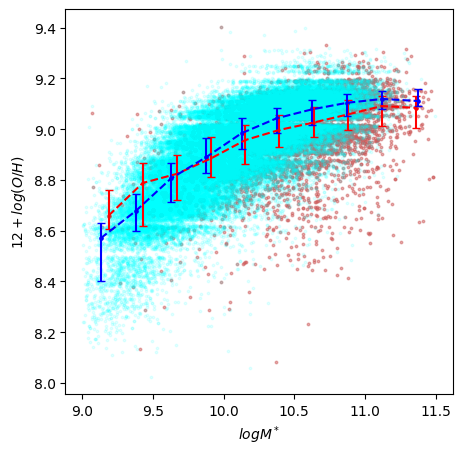

In [25]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
# Field plot
mass_vs_met_plotter(df_ur_up,"red","indianred",ax)
mass_vs_met_plotter(df_ur_down,"blue","cyan",ax,alpha=0.1)
# Glaxias de cumulo
# No tienen metalicidad asi que no puedo hacer este plot

# PLOTS DE CONTORNO

Los plots que deben realizarse son los siguientes:

- sSFR vs masa
- Dn(4000) vs masa
- Separando segun zoo, c y nuvr

In [ ]:
def contour_plot(df2,ax,x="smass",y="d4000",levels=15,bins=80, lmin=1, cmap="viridis"):
    parameter1 = np.array(df2[x])
    parameter2 = np.array(df2[y])
    w = np.array(df2['w'])
    hist = np.histogram2d(parameter1, parameter2, bins=bins, density=True,weights=w)
    counts = hist[0]#/np.sum(hist[0])
    x_mids = (hist[1][:-1]+hist[1][1:])/2
    y_mids = (hist[2][:-1]+hist[2][1:])/2
    # Plot
    cont = ax.contourf(x_mids,y_mids,counts.T,fill=True, levels=np.linspace(np.min(counts),np.max(counts),levels)[lmin:], cmap=cmap)
    #scat = ax.scatter(parameter1,parameter2, alpha=alpha, c=color, s=5.5)
    return ax,cont

def scatter_plot(df2,ax,color,alpha,x="smass",y="d4000"):
    parameter1 = np.array(df2[x])
    parameter2 = np.array(df2[y])
    ax.scatter(parameter1,parameter2, alpha=alpha, c=color, s=5.5)
    return ax

def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return (A1 * np.exp((- (x - mu1)**2) / (2 * sigma1**2)) +
            A2 * np.exp((- (x - mu2)**2)/ (2 * sigma2**2)))

def fitter(x,initial_guess,bins):
    counts,bins = np.histogram(x,bins=bins,density=True)
    bin_mids = (bins[:-1] + bins[1:]) / 2
    popt, pcov = curve_fit(double_gaussian, bin_mids, counts, p0=initial_guess)
    a1, mu1, sigma1, a2, mu2, sigma2 = popt
    weighted_middle = (a1*mu1+a2*mu2)/(a1+a2)
    return mu1,mu2,weighted_middle


In [27]:
def get_dataframes(df,min_values=[0.2,2.5,3.5],max_values=[0.8,3.0,4.5],zoo='pe',c='c',nuvr='nuvr'):
    """Dado un dataframe df, genera 3 sub dataframes donde los valores estan
    separados por:
    - Galaxy zoo
    - c (Indice de concentracion)
    - nuvr (magnitud uv-r)
    Parameters
    ----------
        df : dataframe
        min_values: valores minimos: 0<->zoo, 1<->c, 2<->nuvr
        max_values: valores maximos: 0<->zoo, 1<->c, 2<->nuvr
        zoo : str
            Referencia a zoo en el dataframe
        c : str
            Referencia al indice de concentracion en el dataframe
        nuvr : str
            Referencia al indice nuvr

    Returns
    -------
        Se retornan 6 dataframes:
        [0,1]<-->pe<min_values[0], pe>max_values[1]
        [2,3]<-->c<2.5, c>3.0
        [3,4]<-->
    """
    df_zoo = df[(df[zoo]>max_values[0])|(df[zoo]<min_values[0])]
    df_zoo.reset_index(inplace=True)

    # Ellipticals
    df_zoo_e = df_zoo[df_zoo[zoo]>max_values[0]]
    # Spirals
    df_zoo_s = df_zoo[(df_zoo[zoo]<0.1)&(df_zoo['ps']>0.9)]

    # Concentration index separation
    # c > 3.0
    df_c_3 = df[df[c]>max_values[1]]
    # c< 2.5
    df_c_25 = df[df[c]<min_values[1]]

    #nuvr
    df_nuvr_up = df[df[nuvr]<max_values[2]]
    df_nuvr_down = df[df[nuvr]>min_values[2]]
    return df_zoo_s,df_zoo_e,df_c_25,df_c_3,df_nuvr_up,df_nuvr_down

In [28]:
dfs = get_dataframes(df2)
df0s = get_dataframes(df02,c='C')

/tmp/ipykernel_241480/2449848502.py:10: UserWarning: The following kwargs were not used by contour: 'fill'
  cont = ax.contourf(x_mids,y_mids,counts.T,fill=True, levels=np.linspace(np.min(counts),np.max(counts),levels)[lmin:], cmap=cmap)


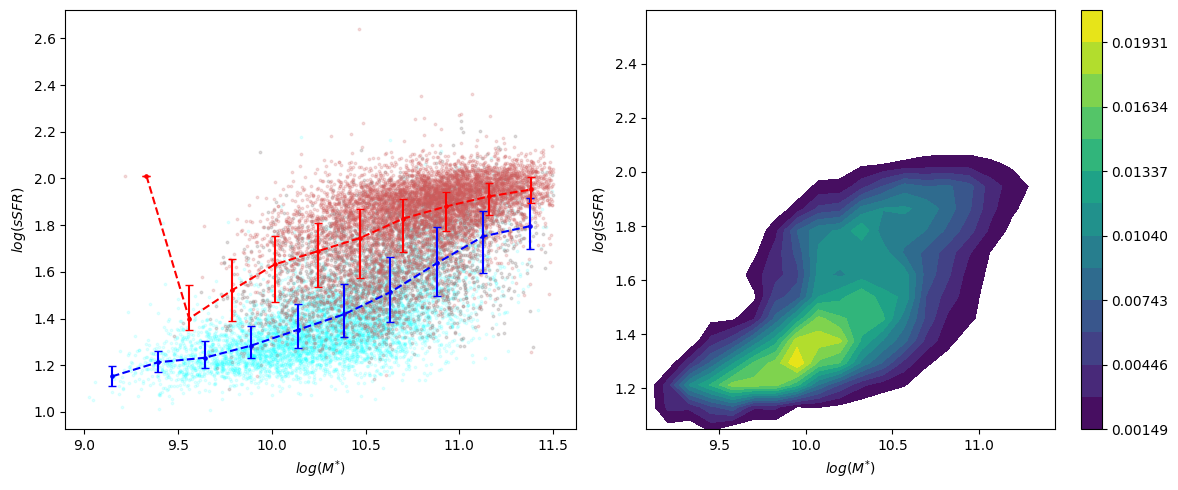

In [36]:
# PLOTEAR TO DO CON ESTO
index = 4
y='d4000'
df = df0s
data10 = pd.concat([df[index],df[index+1]],ignore_index=True)
fig,ax = plt.subplots(1,2,figsize=(12,5))

smass_met_plotter(df[index],y=y,ax=ax[0])
smass_met_plotter(df[index+1],y=y,ax=ax[0],color_scat='indianred',color='red',alpha=0.2)
ax01,count01 = contour_plot(data10,ax[1],y=y,bins=20,levels=15) # Galaxias de grupo

# fig.colorbar(count00, ax=ax00)
fig.colorbar(count01, ax=ax01)
# Set same range for all figures
for axes in ax.flat:
    axes.set_xlabel(r"$log(M^{*})$")
    axes.set_ylabel(r"$log(sSFR)$")
fig.tight_layout()
plt.savefig("multiple11.jpg")

In [30]:
fnuvr = fitter(df02[df02['ur']<4]['nuvr'],[0.06,3,1,0.06,5.5,1],bins=30)
f4000 = fitter(df02[df02['ur']<4]['d4000'],[0.07,1.3,0.2,0.1,1.8,0.1],bins=30)

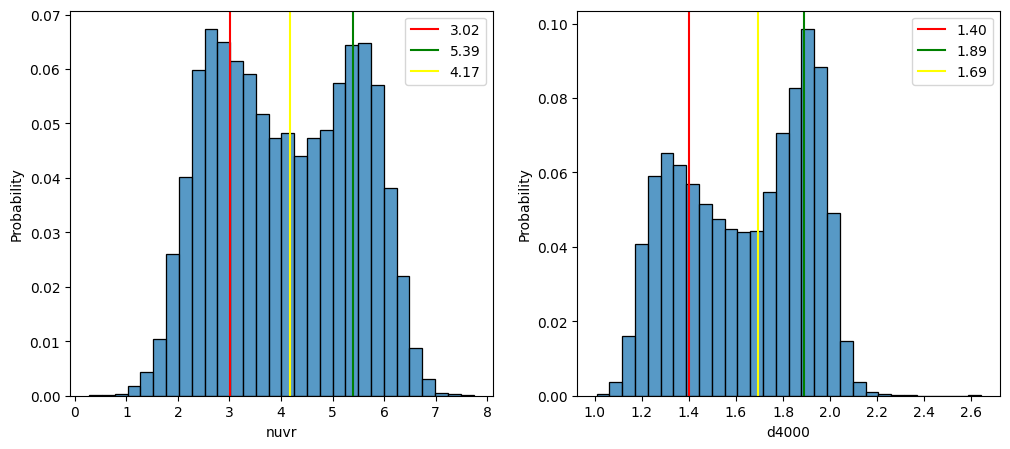

In [31]:
colors = ['red','green','yellow']
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=df02[df02['ur']<4],x='nuvr',bins=30,ax=ax[0],stat='probability')
[ax[0].axvline(x=fnuvr[i],c=colors[i],label=f"{fnuvr[i]:.2f}") for i in [0,1,2]]


sns.histplot(data=df02[df02['ur']<4],x='d4000',bins=30,ax=ax[1],stat='probability')
[ax[1].axvline(x=f4000[i],c=colors[i],label=f"{f4000[i]:.2f}") for i in [0,1,2]]

ax[0].legend()
ax[1].legend()
plt.savefig("dist.jpg")

<Axes: xlabel='nuvr', ylabel='Count'>

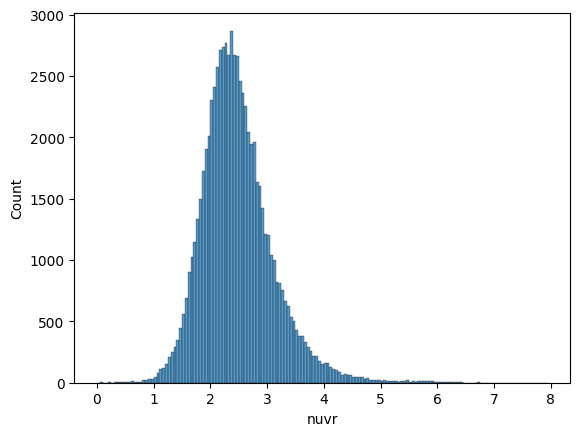

In [32]:
# nuvr para galaxias de campo
sns.histplot(data=df2,x='nuvr',bins=np.arange(0,8,0.05))

## Isocontornos D(4000) vs masa